# Taller 2
## Bastial Alvarez, Isaac Arias

### Carga y preprocesamiento de datos ademas de importacion de bibliotecas

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Función para eliminar filas con valores faltantes
def eliminar_nulos(df):
    return df.dropna()

df = pd.read_csv("kk200.csv") #original


df_filtradoInputado = df #copia 1

float_cols = df_filtradoInputado.select_dtypes(include=["float"])
df_filtradoInputado[float_cols.columns] = float_cols.fillna(float_cols.mean())


df_FiltradoEliminado= df.dropna()# copia 2
print("cantidad de especies: ",df["especie"].value_counts())

#df_filtradoInputado -> poniendo la media en vez que NaN
#df_filtradoEliminado -> eliminando el registro de NaN
#confia que se eliminaron o inputaron ;)

cantidad de especies:  especie
zorra de fuego       8413
cóndor eléctrico     8405
caballo de niebla    8342
ratón acuático       8321
panda ártico         8320
tapir lunar          8199
Name: count, dtype: int64


### Seleccion de variable predictora y Target

In [ ]:
#para los datos filtrados con eliminacion de fila
target_y_fEliminado = df_FiltradoEliminado["especie"]
var_x_fEliminado    = df_FiltradoEliminado.drop(columns="especie")
#para los datos filtrados con inputacion de media
target_y_fInputado  = df_filtradoInputado["especie"]
var_x_fInputado     = df_filtradoInputado.drop(columns="especie")

(50000, 39)


### División en conjuntos de entrenamiento y prueba

In [ ]:
#para datosFiltradoEliminado, le puse E al final de diltrados por eliminacion
X_trainE, X_testE, y_trainE, y_testE = train_test_split(var_x_fEliminado, target_y_fEliminado, test_size=0.2, random_state=42)
X_trainI, X_testI, y_trainI, y_testI = train_test_split(var_x_fInputado, target_y_fInputado, test_size=0.2, random_state=42)
# test_size=0.2 → 20% para test, 80% para entrenamiento

### Entrenamiento 
Se necesitan varios modelos, por ahora hay 4, un arbol de decicion , random forest, KNN, supp. Vector machine

In [ ]:
# modelos de entrenamiento para datos filtradosEliminados
#esta parte es para dividir y buscar parametros de manera rapida, descomentar si no sabemos los hiperparametros
param_grid = {  
    "n_estimators": [500],
    "max_depth": [None, 10,20,25],
    "min_samples_split": [10],
    "min_samples_leaf": [1,2, 4],
    "max_features": ["sqrt", "log2"]
}

df_sample = df.sample(n=5000, random_state=42)
Xs = df_sample.drop(columns=['especie'])    # Ajusta el nombre de la columna objetivo
ys = df_sample['especie']
X_trainS, X_testS, y_trainS, y_testS = train_test_split(
    Xs, ys, test_size=0.2, random_state=42)

hiperParametrosRFCE = {
    'max_depth': None, 
    'max_features': 'sqrt', 
    'min_samples_leaf': 1, 
    'min_samples_split': 10, 
    'n_estimators': 500
    }
rfS =RandomForestClassifier(random_state=42)

grid = GridSearchCV(rfS, param_grid, cv=3, n_jobs=-1, verbose=2) #-> sirve para buscar los mejores hiperparametros
grid.fit(X_trainE, y_trainS) #-> modelo de entrenamiento
hiperParametrosRFCE = grid.best_params_ #-> si no sabemos los mejores hiperparametros, descomentar estas lineas
print(hiperParametrosRFCE)
#rfE = RandomForestClassifier(random_state=42, **hiperParametrosRFCE)
#rfE.fit(X_trainE, y_trainE)

rfI= RandomForestClassifier(random_state=42, **hiperParametrosRFCE)
rfI.fit(X_trainI, y_trainI)



{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


RandomForestClassifier(min_samples_split=10, n_estimators=500, random_state=42)

### Evaluación y comparación de modelos

In [ ]:
# para datos filtrados con eliminacion
y_pred_rfE = rfE.predict(X_testE)
#y_pred_dtE = dtE.predict(X_testE)
#y_pred_knE = knE.predict(X_testE)
#y_pred_vmE = vmE.predict(X_testE)
print("Datos con filtrado por eliminacion")
print("Random Forest Accuracy:", accuracy_score(y_testE, y_pred_rfE))
#print("Decision Tree Accuracy:", accuracy_score(y_testE, y_pred_dtE))
#print("KNNeighbors  Accuracy:", accuracy_score(y_testE, y_pred_dtE))
#print("Support Vector Machine accuaracy:", accuracy_score(y_testE, y_pred_vmE))




#para los datos filtrado con Imputacion
y_pred_rfI = rfI.predict(X_testI)
#y_pred_dtI = dtI.predict(X_testI)
#y_pred_knI = knI.predict(X_testI)
#y_pred_vmI = vmE.predict(X_testI)

print("Datos con filtrado por Inputacion")
print("Random Forest Accuracy:", accuracy_score(y_testI, y_pred_rfI))
#print("Decision Tree Accuracy:", accuracy_score(y_testI, y_pred_dtI))
#print("KNNeighbors  Accuracy:", accuracy_score(y_testI, y_pred_dtI))
#print("Support Vector Machine accuaracy:", accuracy_score(y_testI, y_pred_vmI))



Datos con filtrado por eliminacion
Random Forest Accuracy: 0.5144
Datos con filtrado por Inputacion
Random Forest Accuracy: 0.5144


#### graficos

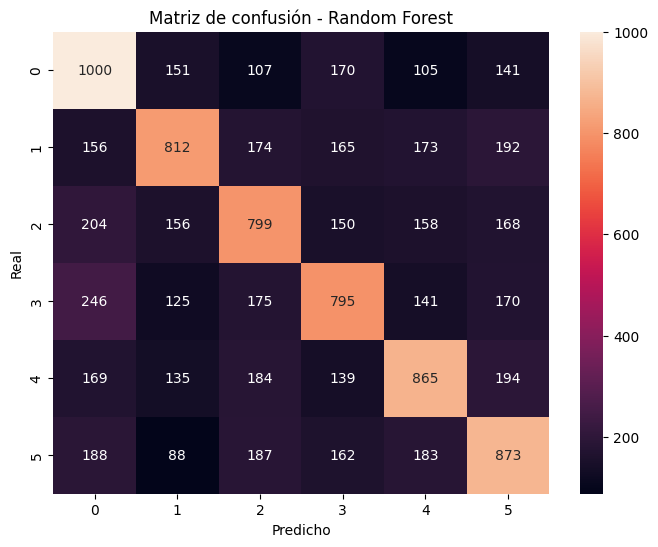

In [39]:
#Para datos filtrado con Eliminacion
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_testE, y_pred_rfE), annot=True, fmt="d")
plt.title("Matriz de confusión - Random Forest")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

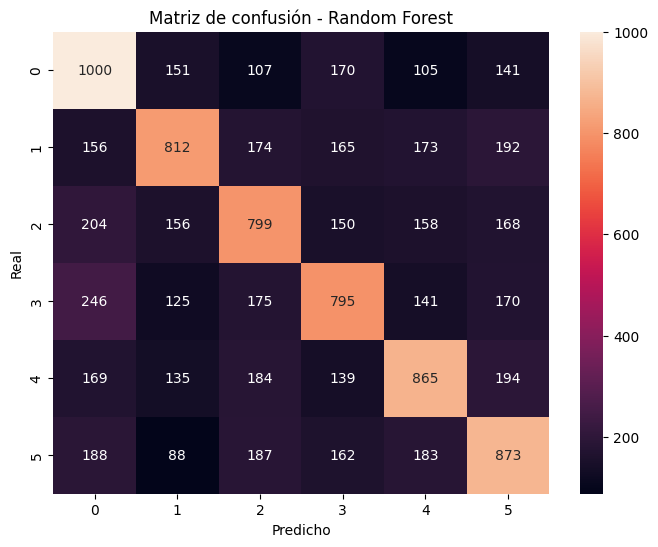

In [40]:
#Para datos filtrado con imputacion

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_testI, y_pred_rfI), annot=True, fmt="d")
plt.title("Matriz de confusión - Random Forest")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

### Análisis de importancia de variables

elasticidad                  0.045700
presencia_lombrices          0.039057
tensión_superficial          0.037043
peso_total_muestra           0.035000
nivel_alcalinidad            0.034993
visibilidad_color            0.033596
temperatura_media            0.032993
fibra                        0.031708
residuos_solubles            0.031683
presencia_microorganismos    0.031290
calor_residual               0.031003
contenido_agua               0.030871
nivel_fermentación           0.029949
acidez                       0.029611
partículas_visibles          0.029093
reacción_jabón               0.029024
contenido_fósforo            0.028170
volatilidad                  0.027683
ph                           0.027588
saturación_luz               0.027583
dtype: float64


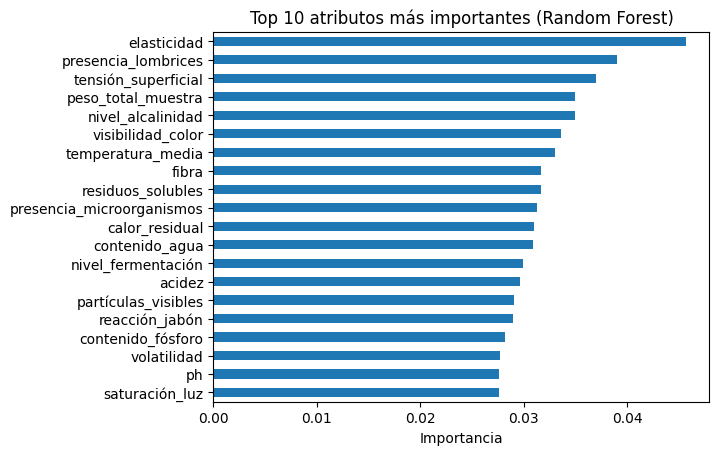

In [41]:
intVarImportante = 20

#para datos con filtrado de eliminacion
importancesE = rfE.feature_importances_
feat_names   = var_x_fEliminado.columns
feat_imp     = pd.Series(importancesE, index=feat_names).sort_values(ascending=False)
print(feat_imp.head(intVarImportante))  # Las 10 variables más importantes
# Gráfico
feat_imp.head(intVarImportante).plot(kind="barh")
plt.title("Top 10 atributos más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

elasticidad                  0.045700
presencia_lombrices          0.039057
tensión_superficial          0.037043
peso_total_muestra           0.035000
nivel_alcalinidad            0.034993
visibilidad_color            0.033596
temperatura_media            0.032993
fibra                        0.031708
residuos_solubles            0.031683
presencia_microorganismos    0.031290
calor_residual               0.031003
contenido_agua               0.030871
nivel_fermentación           0.029949
acidez                       0.029611
partículas_visibles          0.029093
reacción_jabón               0.029024
contenido_fósforo            0.028170
volatilidad                  0.027683
ph                           0.027588
saturación_luz               0.027583
dtype: float64


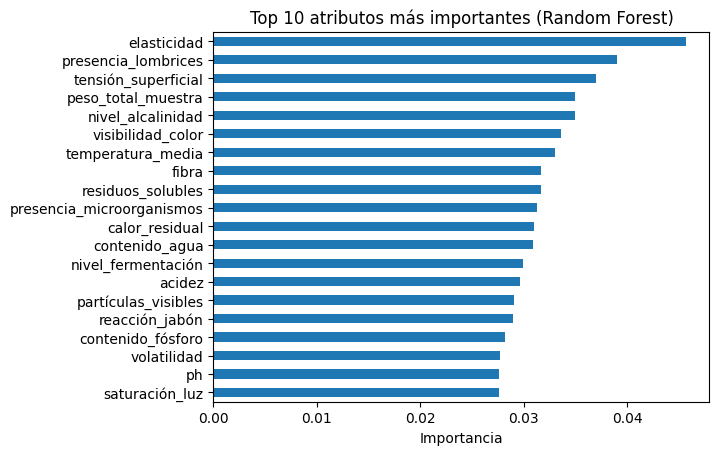

In [43]:
#para datos con filtrado de Inputacion
importancesI = rfI.feature_importances_
feat_names   = var_x_fInputado.columns
feat_imp     = pd.Series(importancesI, index=feat_names).sort_values(ascending=False)
print(feat_imp.head(intVarImportante))  # Las 10 variables más importantes
# Gráfico
feat_imp.head(intVarImportante).plot(kind="barh")
plt.title("Top 10 atributos más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()